In [4]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, IBMQ, execute
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

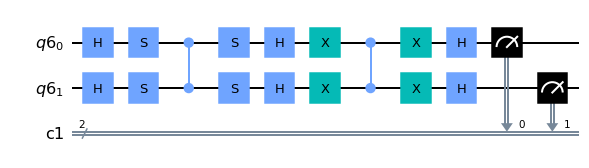

In [5]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr,cr)

#----------------- Preparación de estados iniciales -----------------------

# Se genera la superposición de estados, la cual representa la información
# des estructurada en la cual se buscará el estado cuántico de interés.

qc.h(qr[0])
qc.h(qr[1])

#----------------- Función Oracle -----------------------------------------

# Esta función se encarga de invertir la fase del estado que se quiere
# encontrar.

qc.s(qr[0])
qc.s(qr[1])

qc.cz(qr[0],qr[1])

qc.s(qr[0])
qc.s(qr[1])

qc.h(qr[0])
qc.h(qr[1])

#----------------- Operador de Grover -------------------------------------

# Invierte de nuevo la fase del estado de interés y en este proceso, ampli-
# lifica la amplitud de este y por ende, reduce las de los otros estados,
# de manera que se obtiene una mayor probabilidad de encontrar el sistema
# en el estado que se busca, a la hora de hacer la medición.

qc.x(qr[0])
qc.x(qr[1])

qc.cz(qr[0],qr[1])

qc.x(qr[0])
qc.x(qr[1])

qc.h(qr[0])
qc.h(qr[1])

#----------------- Medición -------------------------------------------

qc.measure(qr[0], 0)
qc.measure(qr[1], 1)

qc.draw('mpl')

{'00': 8192}


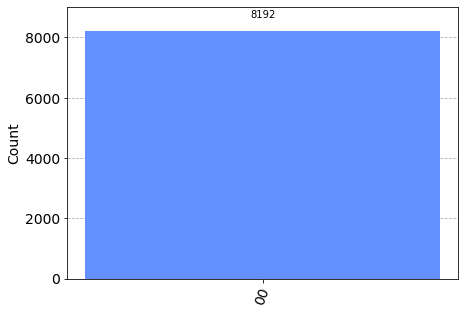

In [6]:
num_ejecuciones = 8192

backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots=num_ejecuciones)
sim_result = job_sim.result()

measurement_result = sim_result.get_counts(qc)
print(measurement_result)
plot_histogram(measurement_result)

In [7]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor


# Loading your IBM Q account(s)
provider = IBMQ.load_account()

shots = 8192
#shots=15000
provider = IBMQ.get_provider(hub='ibm-q-education', group='uni-antioquia-1', project='qcudea2022-1')
#provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')


remote_backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 and not x.configuration().simulator and x.status().operational==True))
print("El computador cuántico menos ocupado es el " + remote_backend.name())


remote_backend = "ibm_quito"
job = execute(qc, remote_backend, shots=shots) # Run our circuit

job_monitor(job)                               # Monitoring our job, se comenta cuando estamos utilizando la reserva

# Plotting our result
result = job.result()
result_count=result.get_counts(qc)
plot_histogram(result_count)

El computador cuántico menos ocupado es el ibmq_quito
Traceback (most recent call last):
  Input In [7] in <cell line: 20>
    job = execute(qc, remote_backend, shots=shots) # Run our circuit
  File /opt/conda/lib/python3.8/site-packages/qiskit/execute_function.py:299 in execute
    experiments = transpile(
  File /opt/conda/lib/python3.8/site-packages/qiskit/compiler/transpiler.py:327 in transpile
    unique_transpile_args, shared_args = _parse_transpile_args(
  File /opt/conda/lib/python3.8/site-packages/qiskit/compiler/transpiler.py:651 in _parse_transpile_args
    faulty_qubits_map = _parse_faulty_qubits_map(backend, num_circuits)
  File /opt/conda/lib/python3.8/site-packages/qiskit/compiler/transpiler.py:980 in _parse_faulty_qubits_map
    return [_create_faulty_qubits_map(backend)] * num_circuits
  File /opt/conda/lib/python3.8/site-packages/qiskit/compiler/transpiler.py:730 in _create_faulty_qubits_map
    if backend.properties():
AttributeError: 'str' object has no attribute 'p